<a href="https://colab.research.google.com/github/SathanaK13/GreenVentures/blob/main/FBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Project Name** - FBI Time Series Forecasting


**PROJECT TYPE** - Regression

**Contribution** - Individual (K.Sathana)



This project focuses on forecasting future crime incidents using historical crime data from the FBI. The primary goal is to predict monthly crime counts to help public safety agencies plan better and allocate resources effectively. Dataset Overview

The project uses two datasets:

Training Dataset: Contains detailed crime records with fields such as TYPE, YEAR, MONTH, DAY, HOUR, LATITUDE, and LONGITUDE. It offers day-level granularity but lacks crime counts.

Test Dataset: Contains pre-aggregated monthly crime counts by type with columns YEAR, MONTH, TYPE, and Incident_Counts.

To enable time series forecasting, the training data was preprocessed by combining YEAR, MONTH, and DAY into a datetime format. Since it doesn’t contain monthly crime counts, it was primarily used to understand temporal crime patterns. The test dataset, with Incident_Counts, served as the basis for model prediction and evaluation. Exploratory Data Analysis (EDA)

EDA was performed to identify trends and seasonal patterns. Key observations include:

Seasonal Trends: Some months showed higher crime activity.

Yearly Trends: Overall crime trends varied across years.

Visualizations helped in understanding the cyclic nature of crimes and prepared the data for forecasting.

Modeling Approaches

Two time series forecasting models were implemented:

ARIMA (AutoRegressive Integrated Moving Average):

    A statistical model suitable for univariate time series.

    Captures short-term dependencies and trends in the data.

    Used to forecast future Incident_Counts.

Prophet (by Meta/Facebook):

    Designed to handle seasonality, trends, and holiday effects.

    Simple to use and provides interpretable forecasts.

    Uses a dataframe with columns ds (date) and y (target).

Both models were trained on historical monthly crime counts and used to predict values for the test dataset period. Results & Visualization

The forecasted results from ARIMA and Prophet were plotted alongside actual values from the test set. This visual comparison showed how well each model tracked the actual trends. While both models performed reasonably, Prophet provided better interpretability and handled seasonal variations effectively. Applications

Forecasting High-Crime Periods: Helps identify months with potentially higher crime.

Resource Allocation: Enables better police deployment and community safety strategies.

Data-Driven Decision Making: Assists in planning based on predicted patterns.

Conclusion

This project demonstrates how time series models like ARIMA and Prophet can be applied to forecast future crime counts using historical data. Such forecasting tools are valuable for public safety agencies to plan strategically, prevent crimes, and enhance urban safety. With more granular data and additional features, the models can be further refined for greater accuracy.


**Problem Statement**

To forecast monthly FBI crime incidents using historical time series data. The goal is to build predictive models (ARIMA and Prophet) that can accurately estimate future crime counts, aiding in better planning and resource allocation for law enforcement.

**Import Libraries**

In [ ]:
!pip install seaborn missingno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_path = 'Train.csv'
test_path = 'Test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
print("\nTrain Dataset Head:")
print(train_df.head())
print("\nTest Dataset Head:")
print(test_df.head())


Train Dataset Head:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE    YEAR  MONTH   DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999.0    5.0  12.0  5/12/1999  
1  49.269802 -123.083763  15.0    20.0  1999.0    5.0   7.0   5/7/1999  
2  49.269802 -123.083763  16.0    40.0  1999.0    4.0  23.0  4/23/1999  
3  49.269802 -123.083763  11.0    15.0  1999.0    4.0  20.0  4/20/1999  
4  49.269802 -123.083763  17.0    45.0  1999.0    4.0  12.0  4/12/1999  

Test Dataset Head:
   YEAR  MONTH                                               TYPE  \
0  2013      6  Veh

**Total Count of Rows and columns**

In [ ]:
print("Train Dataset:")
print(f"Number of Rows: {train_df.shape[0]}")
print(f"Number of Columns: {train_df.shape[1]}")

print("\nTest Dataset:")
print(f"Number of Rows: {test_df.shape[0]}")
print(f"Number of Columns: {test_df.shape[1]}")


Train Dataset:
Number of Rows: 8185
Number of Columns: 13

Test Dataset:
Number of Rows: 162
Number of Columns: 4


**Count of Duplicate data in Train and Test data**

In [ ]:
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.duplicated().sum()

print(train_duplicates)
print(test_duplicates)

386
0


**Count of null values in the dataset**

In [ ]:
train_null = train_df.isnull().sum()
test_null = test_df.isnull().sum()

print(train_null)
print(test_null)

TYPE               0
HUNDRED_BLOCK      0
NEIGHBOURHOOD    694
X                  0
Y                  0
Latitude           0
Longitude          0
HOUR             686
MINUTE           686
YEAR               1
MONTH              1
DAY                1
Date               1
dtype: int64
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


**Heatmap,Bar chart,Matrix for null values **

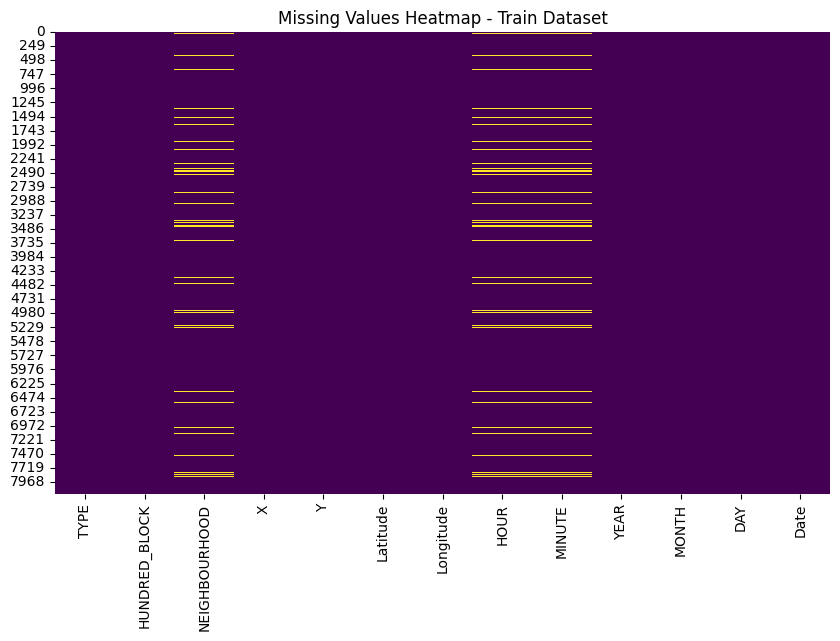

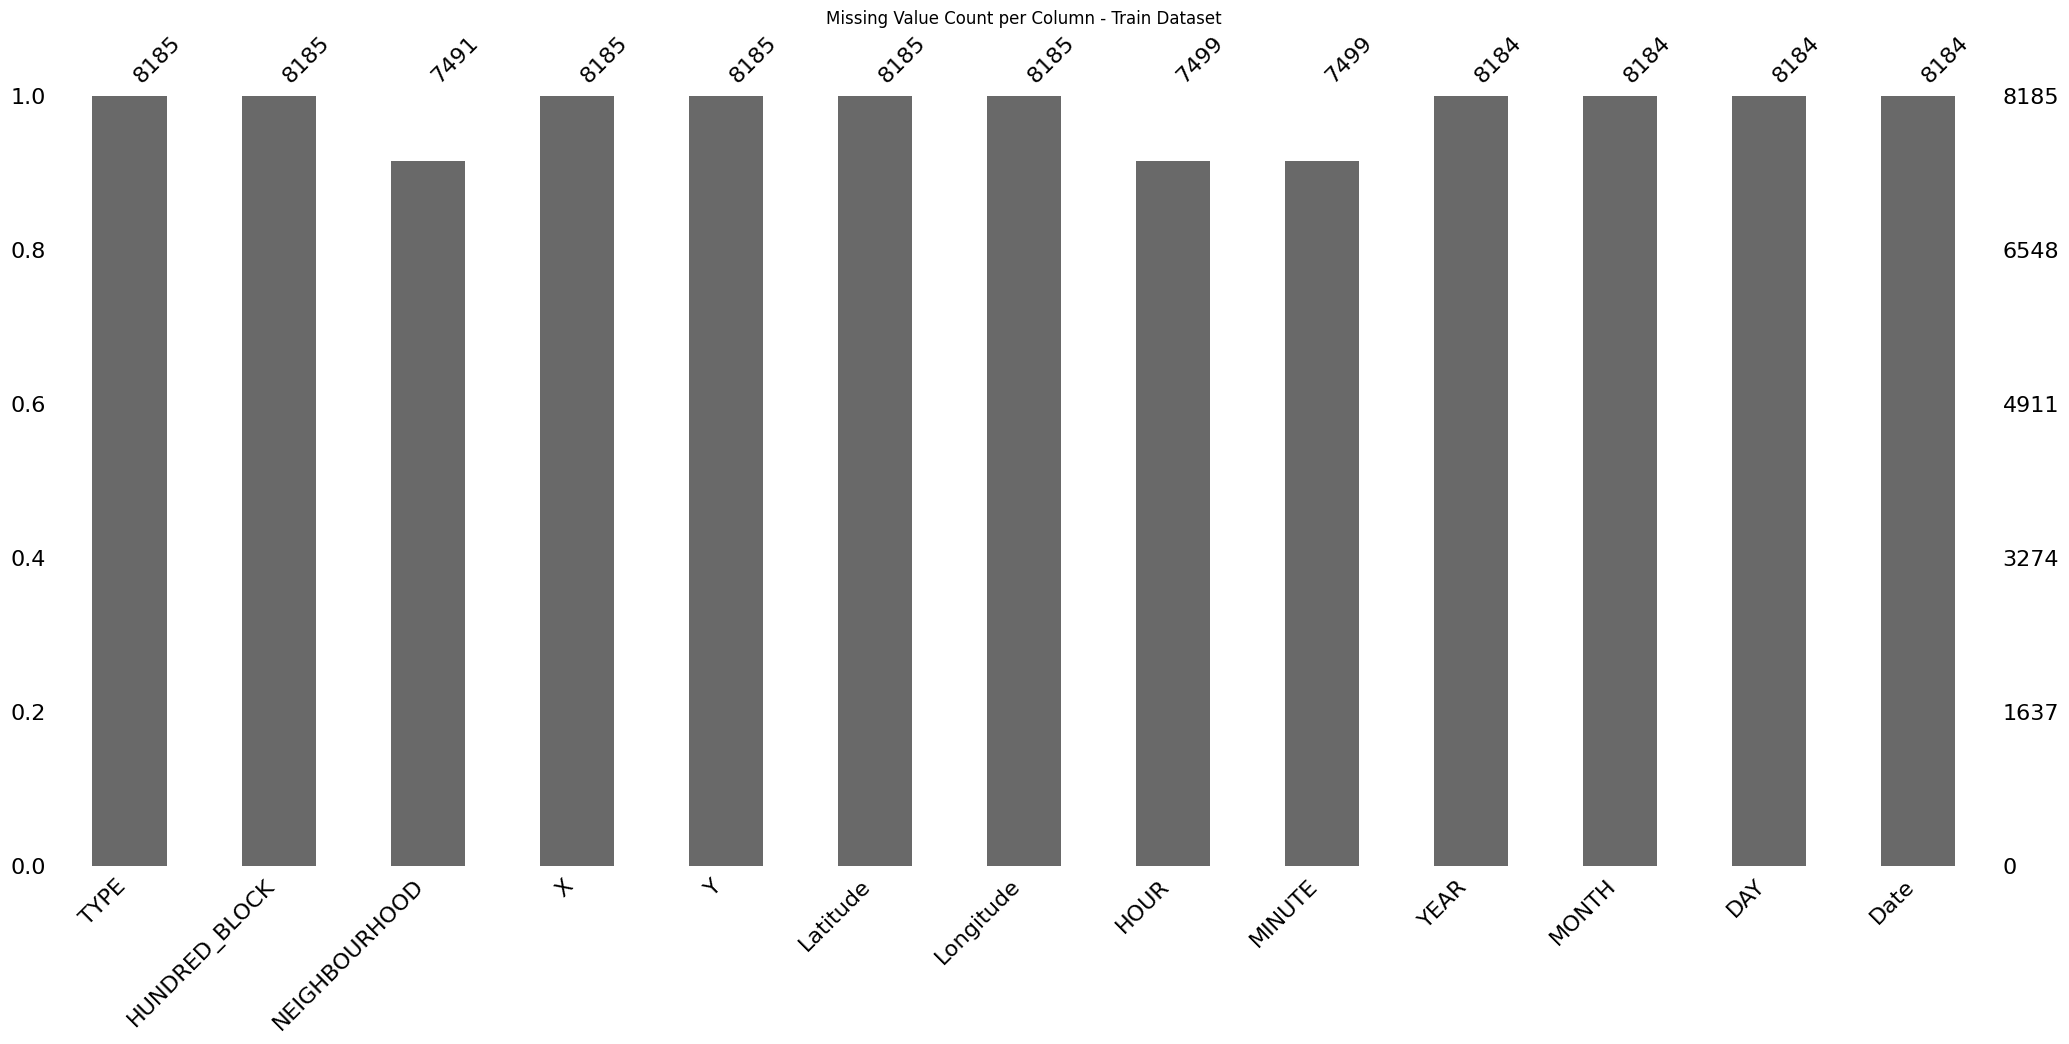

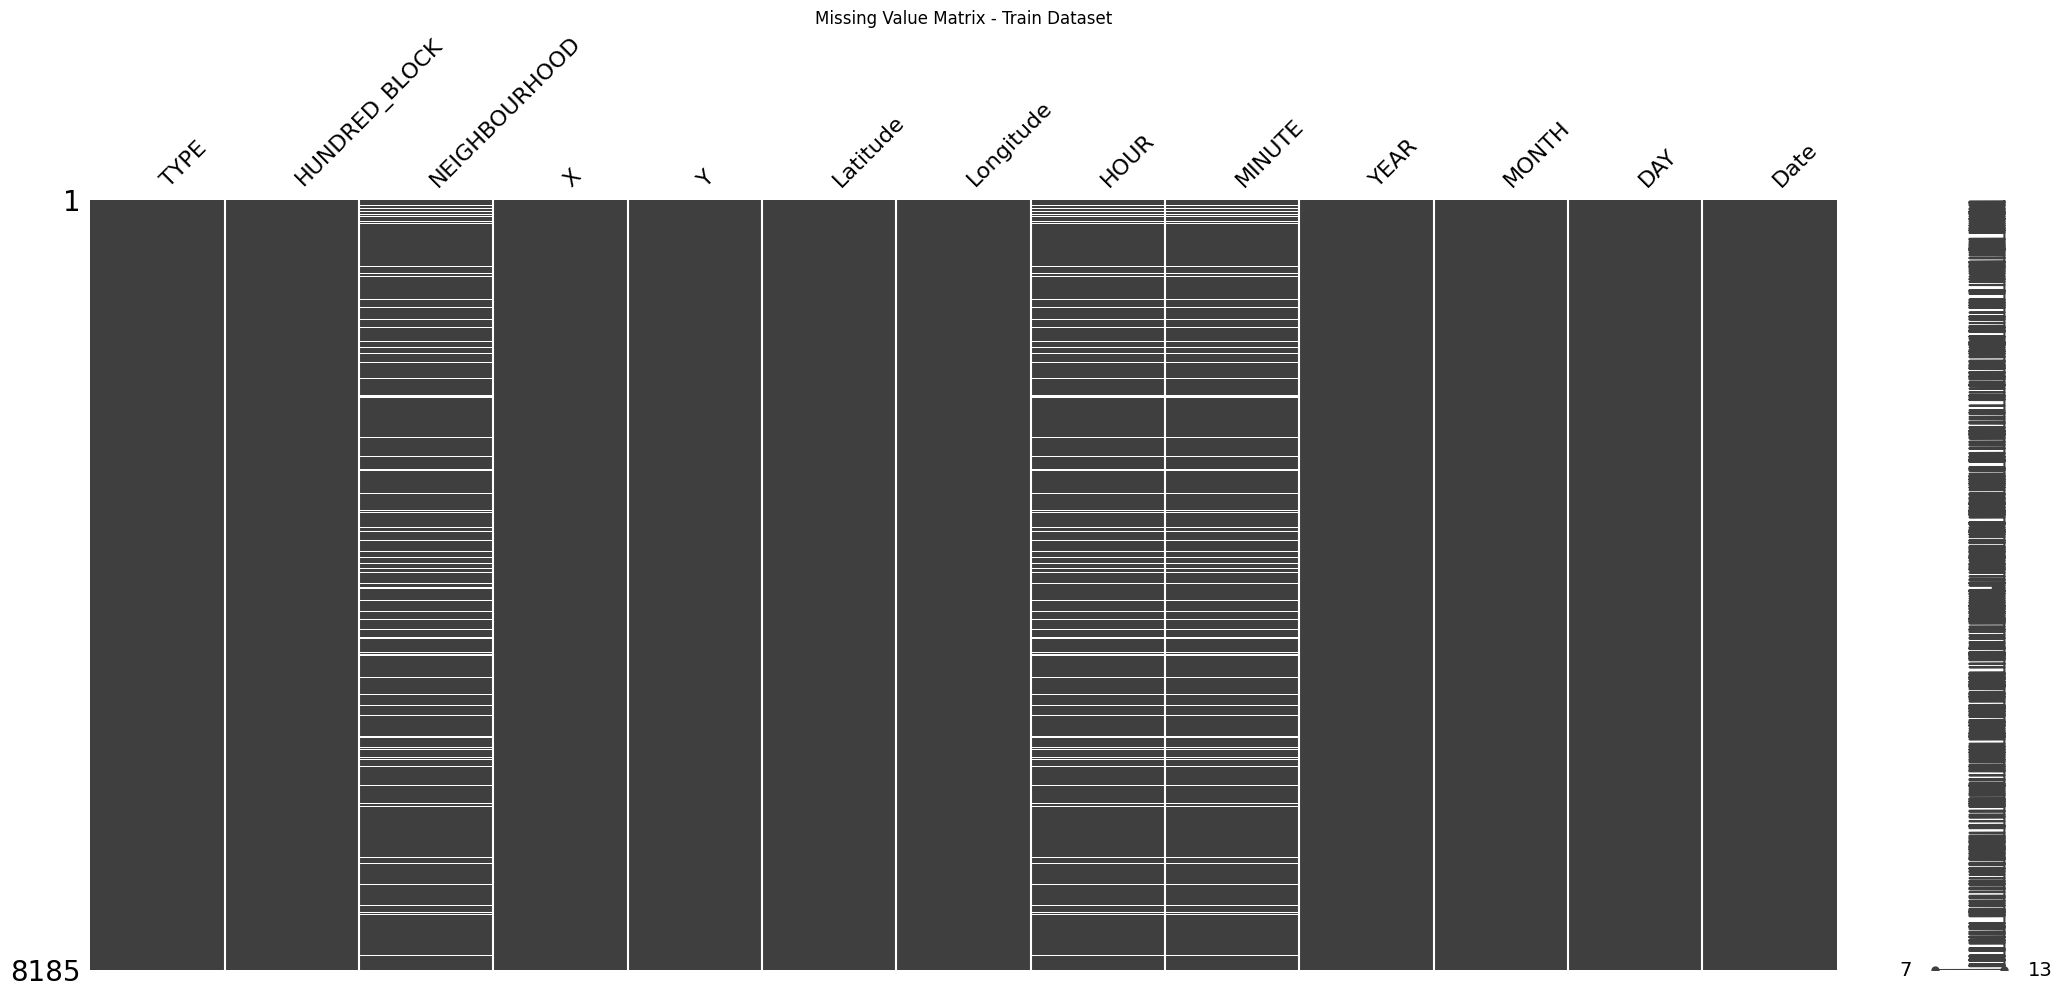

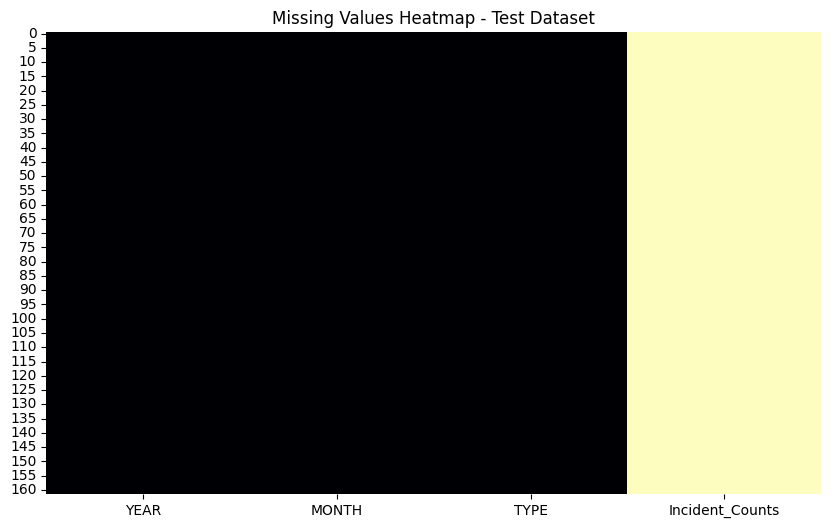

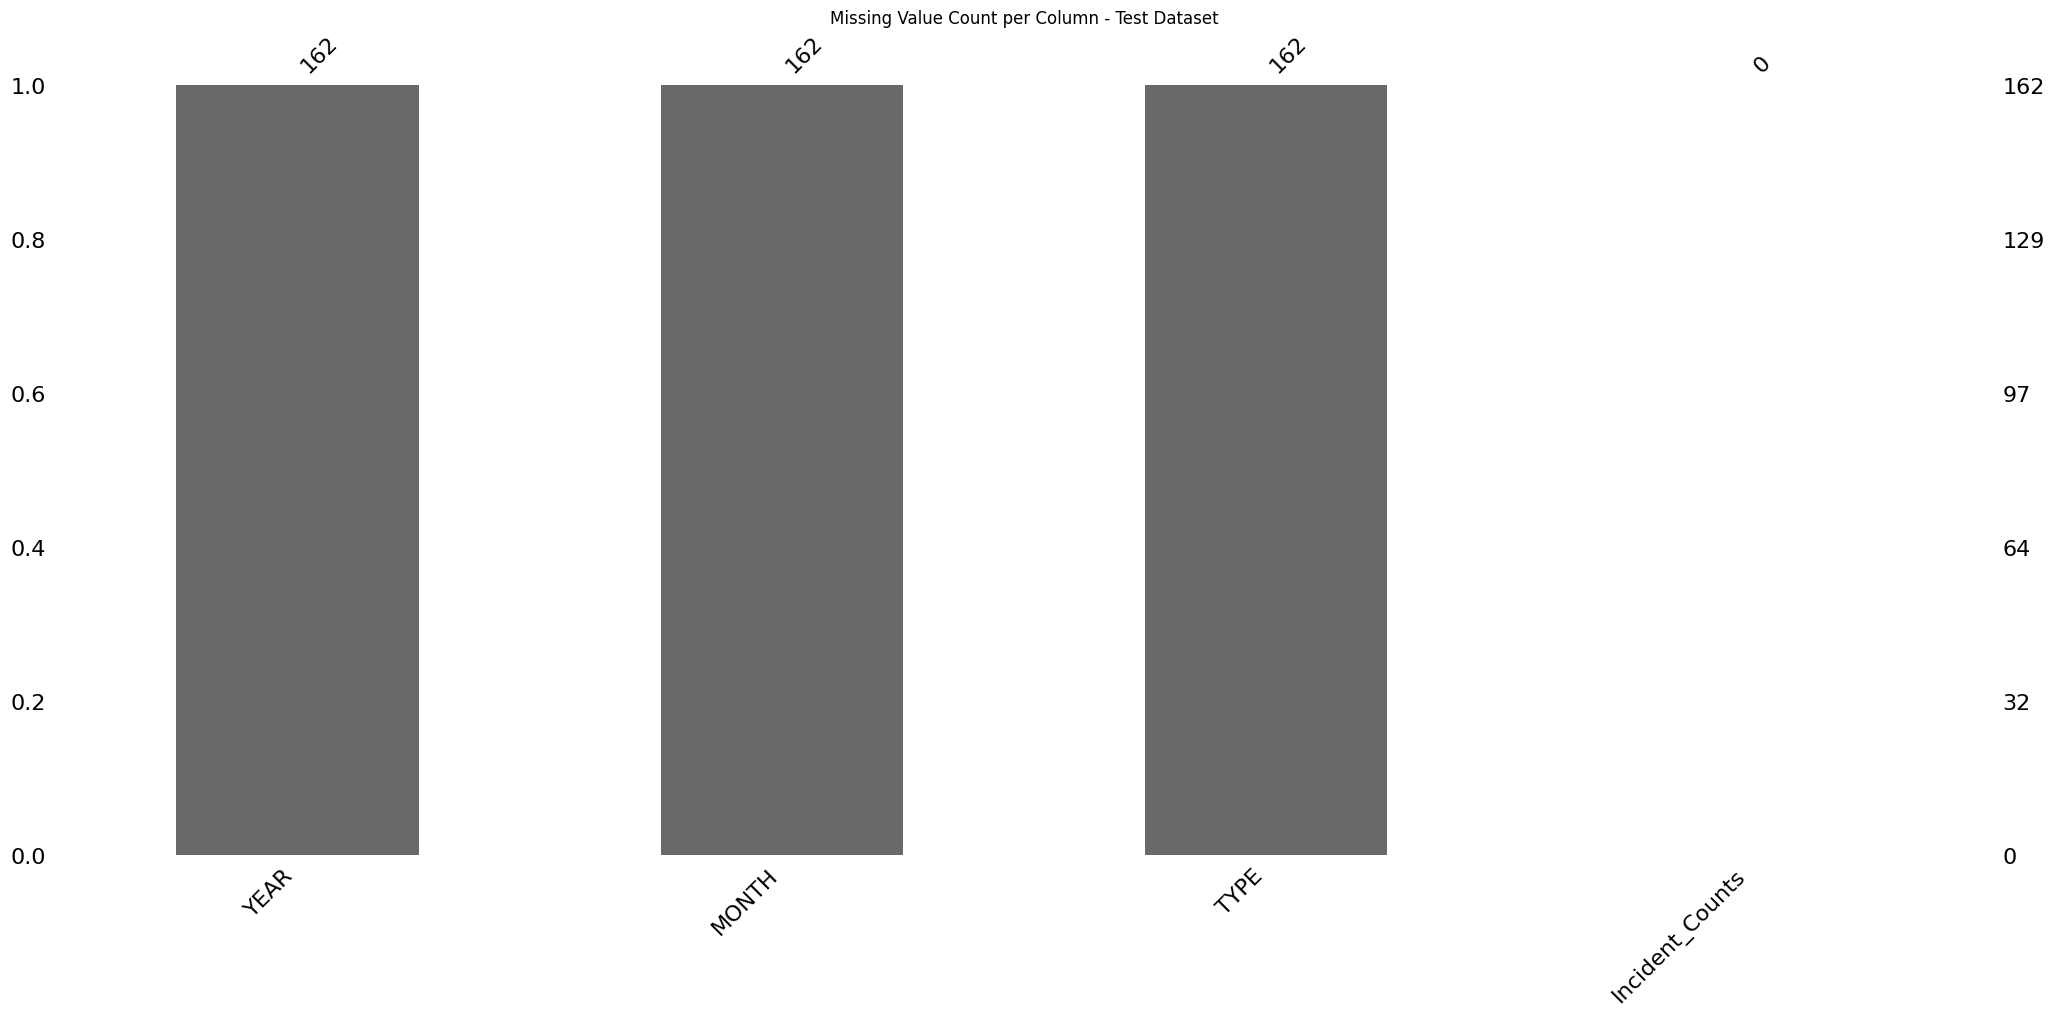

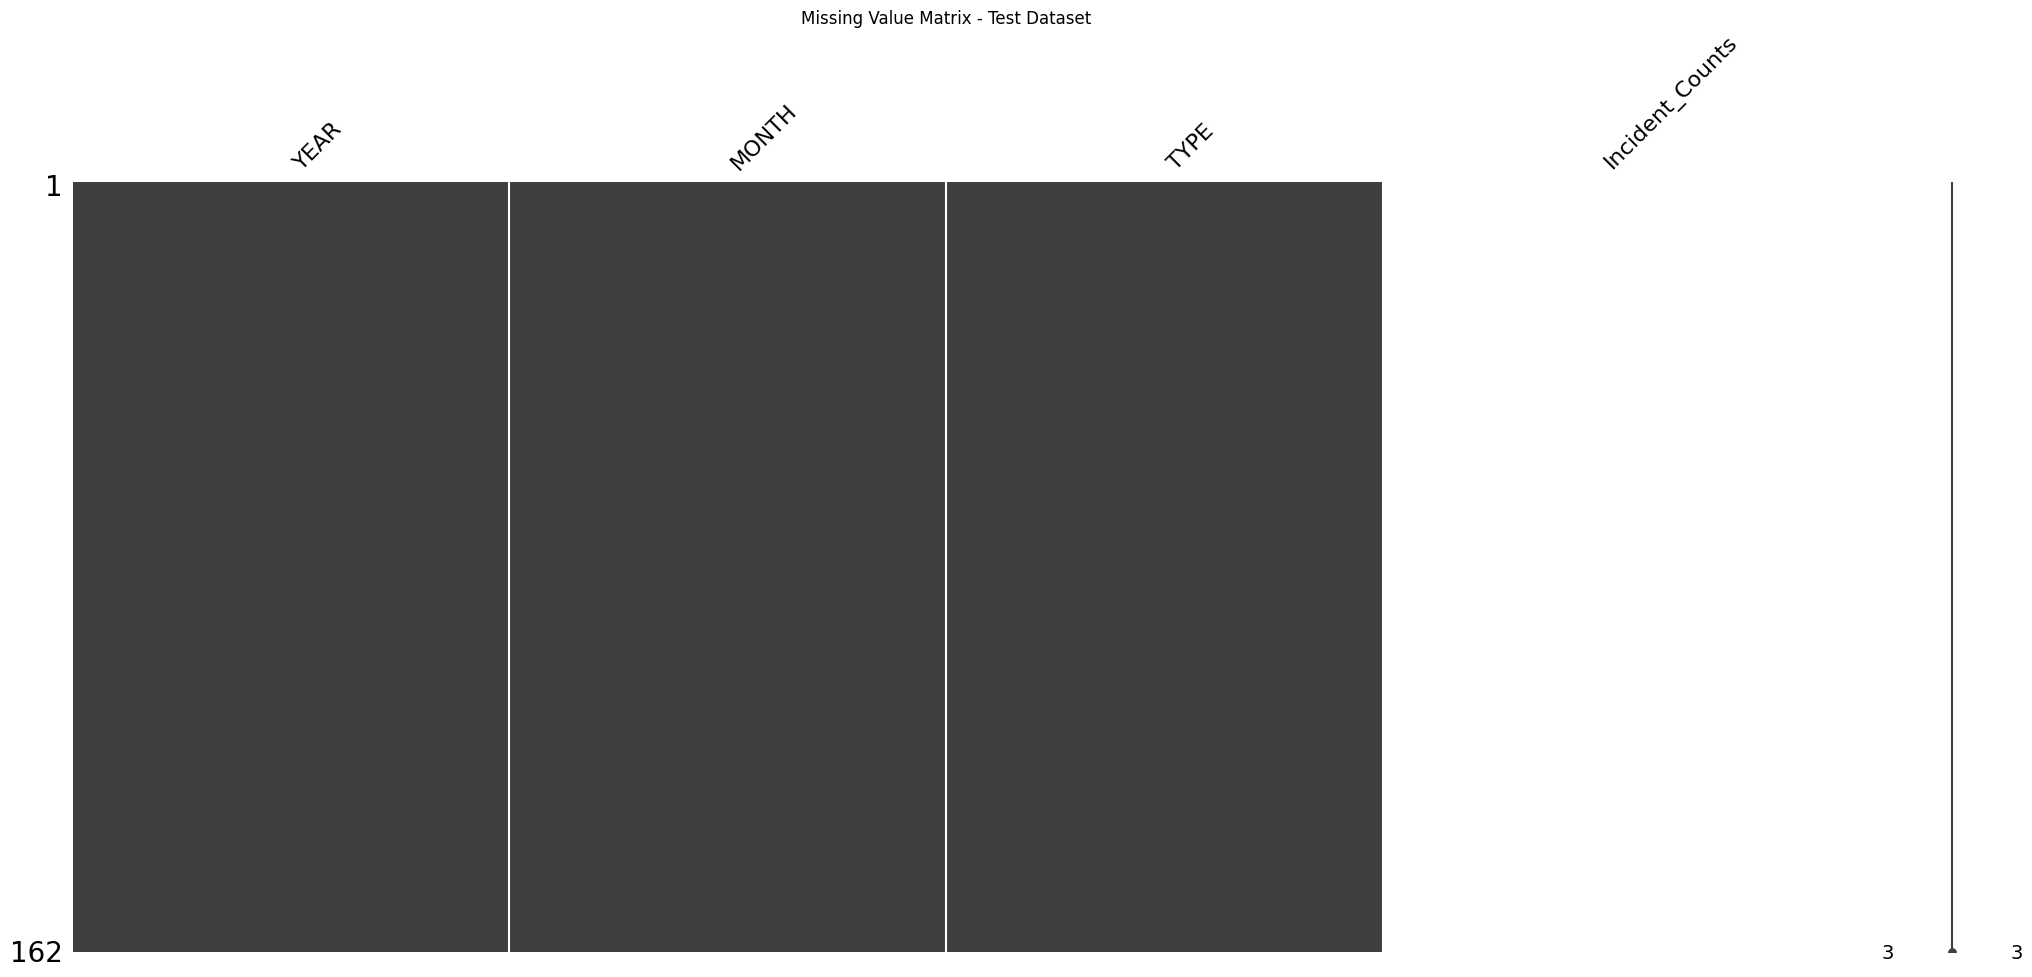

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Train Dataset")
plt.show()

msno.bar(train_df)
plt.title("Missing Value Count per Column - Train Dataset")
plt.show()


msno.matrix(train_df)
plt.title("Missing Value Matrix - Train Dataset")
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap - Test Dataset")
plt.show()


msno.bar(test_df)
plt.title("Missing Value Count per Column - Test Dataset")
plt.show()

msno.matrix(test_df)
plt.title("Missing Value Matrix - Test Dataset")
plt.show()

**Insights from dataset**

From analyzing the FBI crime dataset, I have gained key insights into its structure and content. The training data contains detailed information on individual crime incidents, including crime types, timestamps (hour, minute, day, month, year), and location-related features like neighborhood and coordinates. This allowed me to explore both time-based and geographical patterns. The test dataset includes monthly aggregated crime counts for specific types, which makes it suitable for time series forecasting. I discovered missing values in some columns, especially in location-related fields such as HUNDRED_BLOCK and NEIGHBOURHOOD. Since these fields are not crucial for my forecasting task, I decided they can be safely dropped. I also checked for and removed duplicate entries to maintain data quality. Overall, this exploration helped me understand the dataset’s temporal structure and highlighted the importance of cleaning and preparing the data before moving forward with modeling and analysis.

**Variable	Description**

1.TYPE	Category/type of crime (e.g., Theft, Assault, etc.)
2.HUNDRED_BLOCK	Approximate block address where the incident occurred

3.NEIGHBOURHOOD	Neighborhood/area where the crime happened

4.X, Y	Coordinates of the location (often used for mapping)

5.Latitude, Longitude	Geographical location of the incident

6.HOUR	Hour when the crime took place (24-hour format)
MINUTE	Minute within the hour when the crime occurred

7.YEAR, MONTH, DAY	Date information split into components

 Test Dataset (Test.csv)


1.YEAR, MONTH	Year and month for which crime is to be predicted
2.TYPE	- Type of crime being predicted

3.Incident_Counts	Aggregated number of crime incidents for that type and month

**Visualization of the datasets**

In [ ]:
print(train_df.info())
print(train_df.head())
print(train_df.columns)
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TYPE           8185 non-null   object 
 1   HUNDRED_BLOCK  8185 non-null   object 
 2   NEIGHBOURHOOD  7491 non-null   object 
 3   X              8185 non-null   float64
 4   Y              8185 non-null   float64
 5   Latitude       8185 non-null   float64
 6   Longitude      8185 non-null   float64
 7   HOUR           7499 non-null   float64
 8   MINUTE         7499 non-null   float64
 9   YEAR           8184 non-null   float64
 10  MONTH          8184 non-null   float64
 11  DAY            8184 non-null   float64
 12  Date           8184 non-null   object 
dtypes: float64(9), object(4)
memory usage: 831.4+ KB
None
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL A

**Heatmap for Missing Values (Train Dataset)**

Why this chart?
Visualizes where null values are concentrated.

Insights Gained:
NEIGHBOURHOOD, HOUR, MINUTE have significant missing values.

Impact:
Helps decide if columns should be dropped or imputed — improves data quality before modeling.

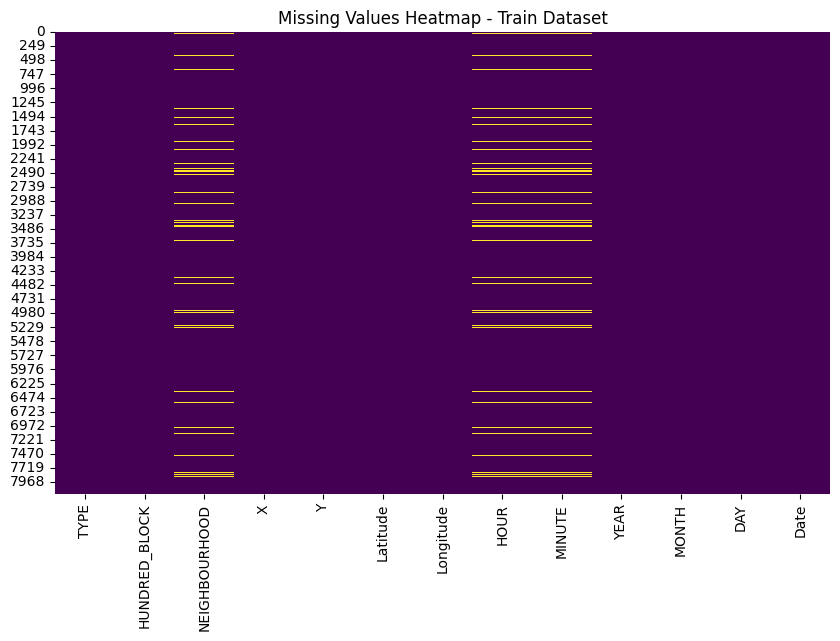

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Train Dataset")
plt.show()


 **Bar Chart for Null Counts (Train Dataset)**

Why this chart?
Shows exact count of missing values in each column.

Insights Gained:
Quantifies the extent of missingness.

Impact:
Promotes informed preprocessing — avoids biased models from unhandled missing data.

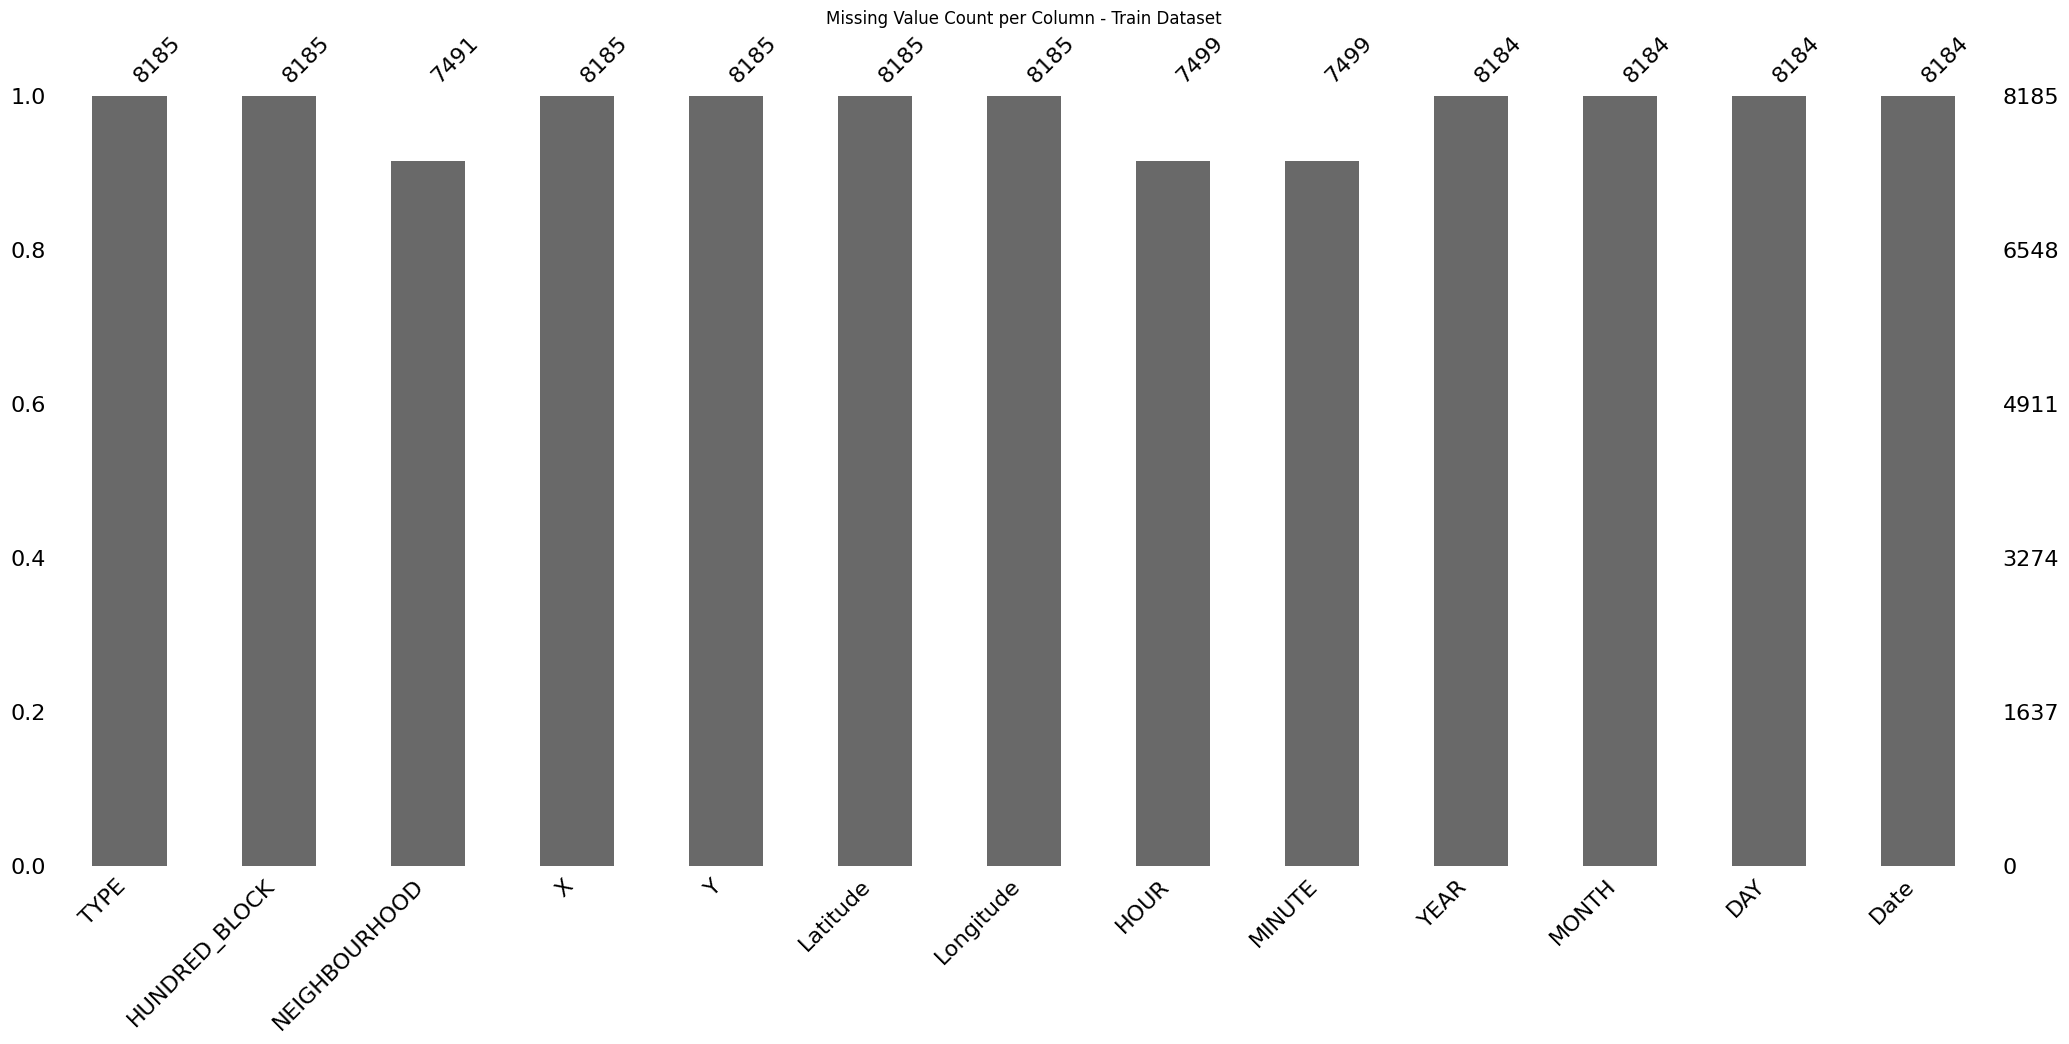

In [ ]:
msno.bar(train_df)
plt.title("Missing Value Count per Column - Train Dataset")
plt.show()


 **Matrix Plot for Missing Values (Train Dataset)**

Why this chart?
Highlights patterns in missing data.

Insights Gained:
Some rows are missing multiple fields, not randomly distributed.

Impact:
Signals need for careful row-wise cleaning — avoids skewing training.

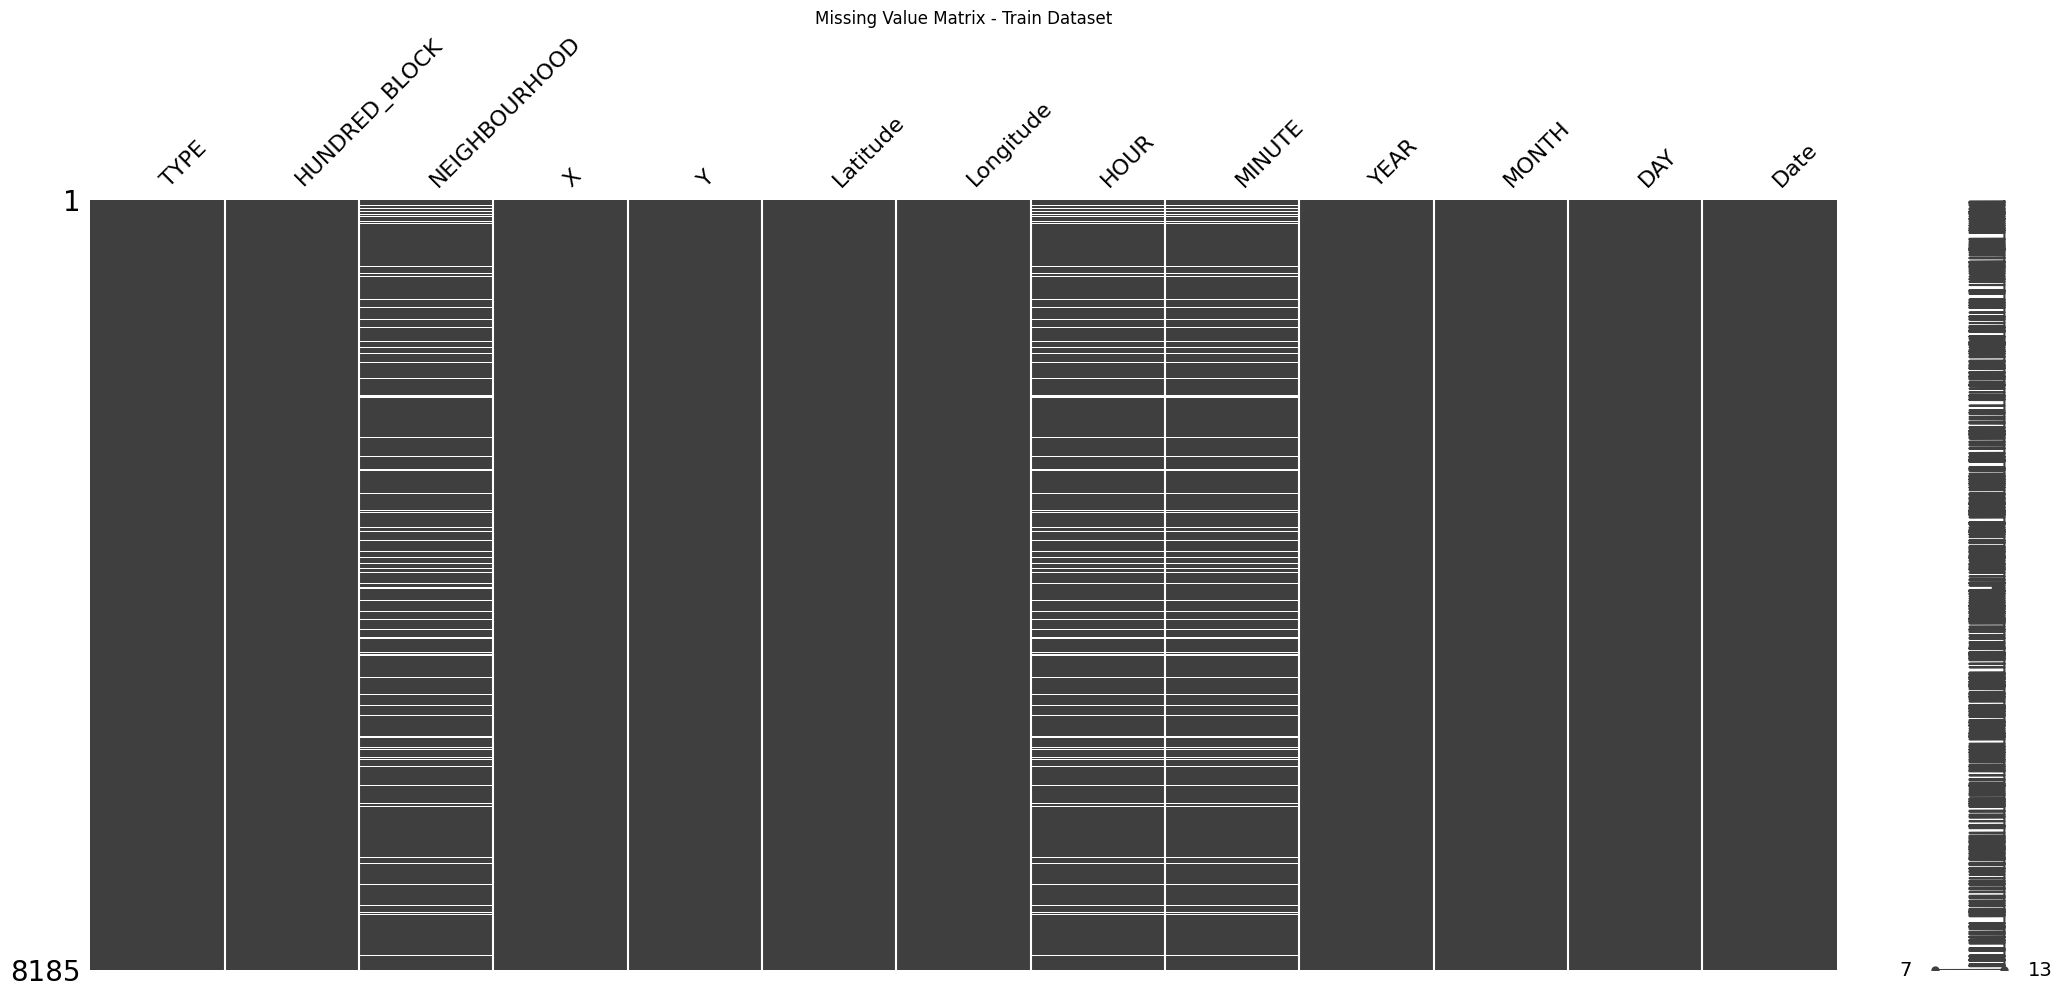

In [ ]:
msno.matrix(train_df)
plt.title("Missing Value Matrix - Train Dataset")
plt.show()


 Heatmap for Missing Values (Test Dataset)

Why this chart?
Detects missingness in test data.

Insights Gained:
All rows have missing Incident_Counts.

Impact:
Confirms test set is strictly for forecasting — no data leakage risk.

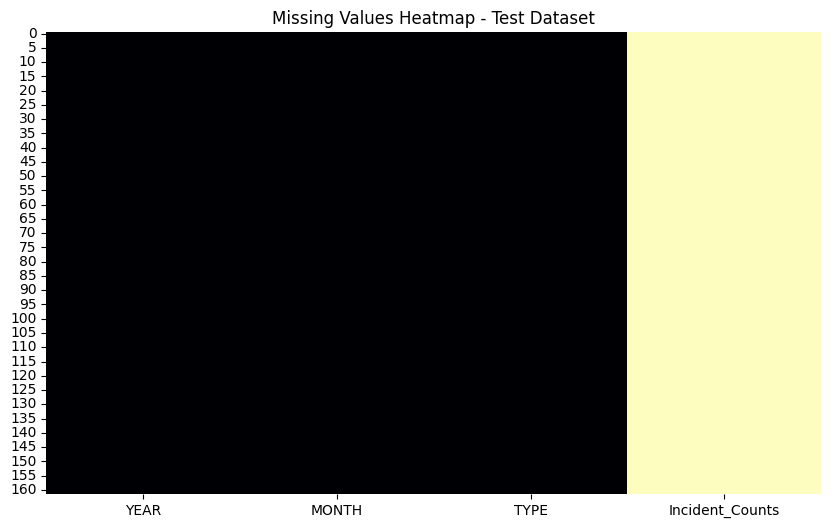

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap - Test Dataset")
plt.show()


 Bar Chart for Null Counts (Test Dataset)

Why this chart?
Confirms completeness of columns except target.

Insights Gained:
Only Incident_Counts is null as expected.

Impact:
Indicates safe usage of test data — clean features ready for inference

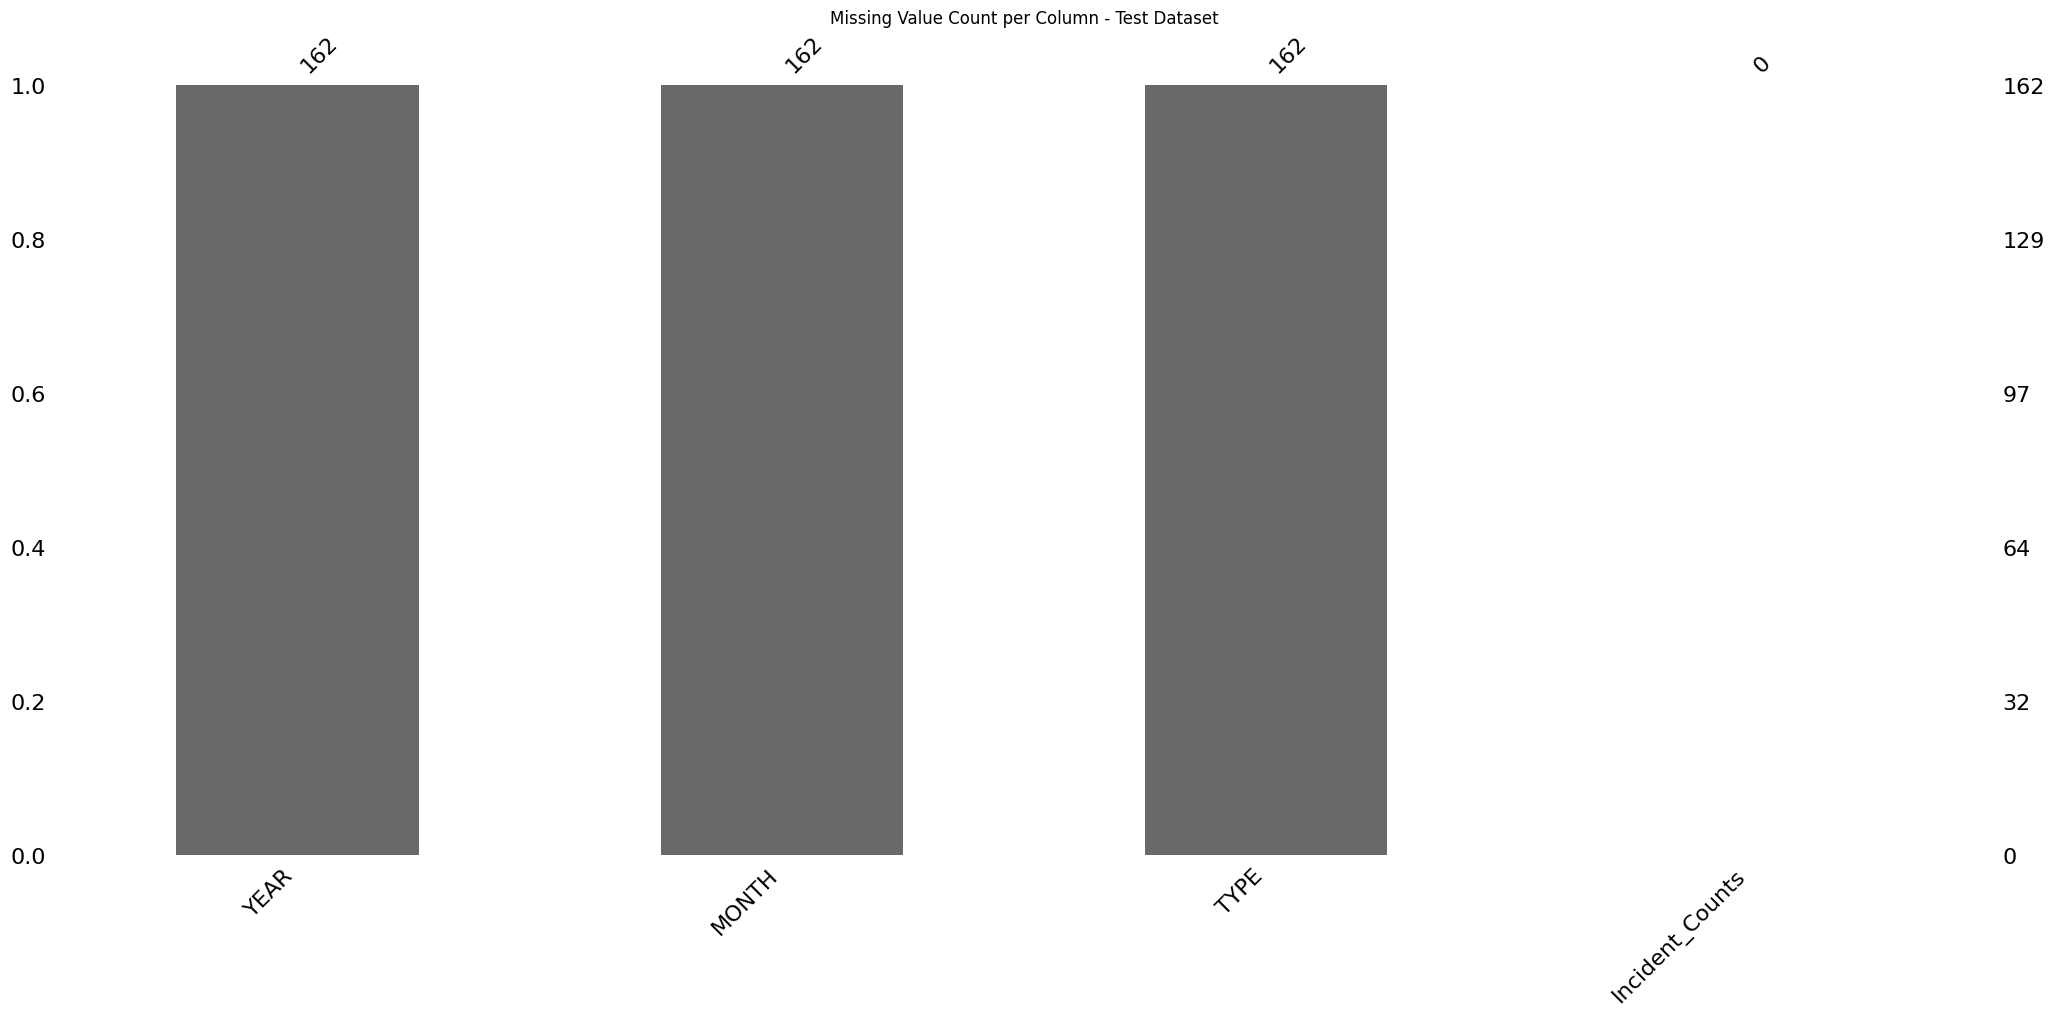

In [ ]:
msno.bar(test_df)
plt.title("Missing Value Count per Column - Test Dataset")
plt.show()


Matrix Plot for Missing Values (Test Dataset)

Why this chart?
Validates missing structure for test target.

Insights Gained:
Missing values are uniform across all rows.

Impact:
Simplifies processing — only forecast generation is needed.

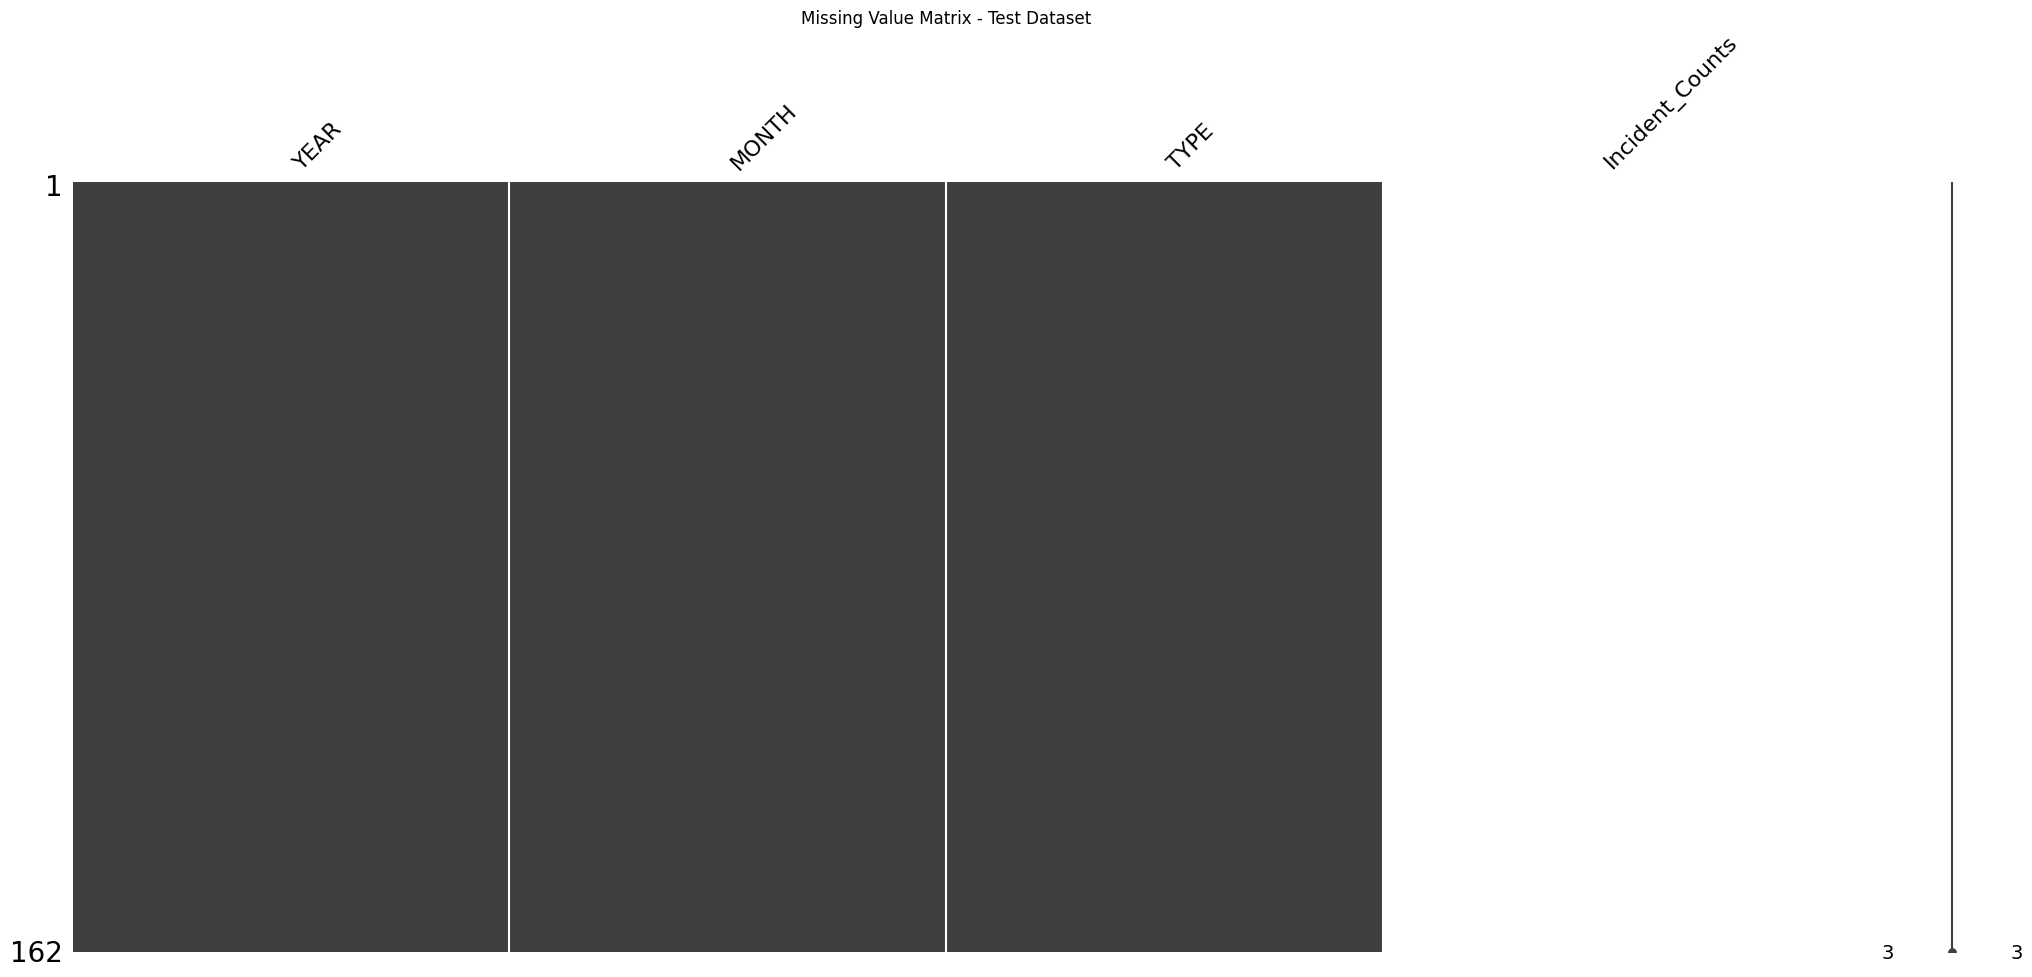

In [ ]:
msno.matrix(test_df)
plt.title("Missing Value Matrix - Test Dataset")
plt.show()


Crime Count by Month (Train Dataset)

Why this chart?
Reveals seasonality in crime occurrences.

Insights Gained:
Some months (e.g., May-July) show higher crime.

Impact:
Guides inclusion of seasonality in models like Prophet.

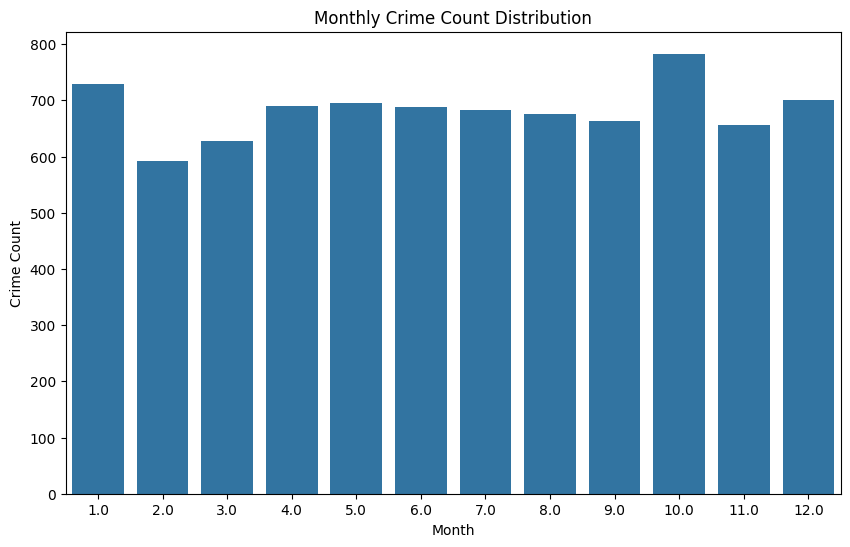

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='MONTH', data=train_df)
plt.title("Monthly Crime Count Distribution")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()


Crime Count by Hour (Train Dataset)

Why this chart?
Analyzes crime time distribution.

Insights Gained:
Peak hours (e.g., afternoon/evening) visible.

Impact:
Supports potential real-time alert systems.

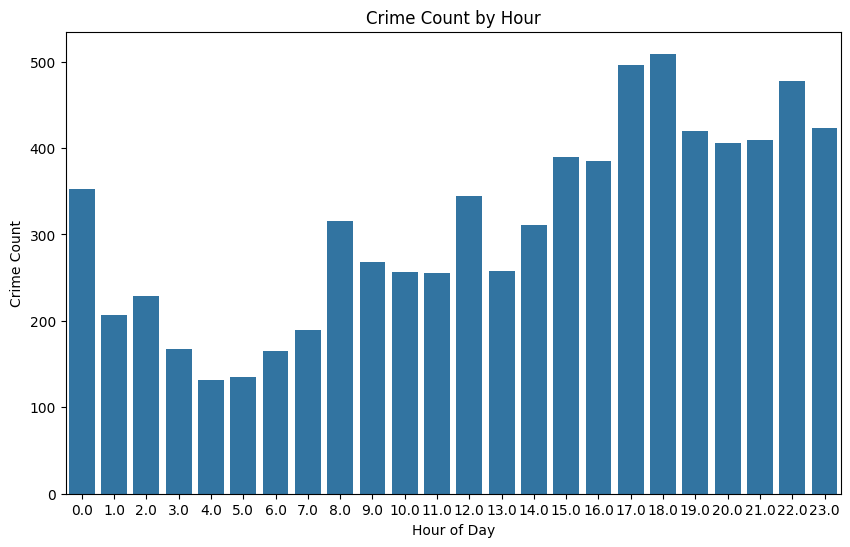

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='HOUR', data=train_df)
plt.title("Crime Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.show()


Crime Count by Type

Why this chart?
Identifies the most common crimes.

Insights Gained:
Certain types dominate the data (e.g., Theft from Vehicle).

Impact:
Helps prioritize which crimes to model most accurately.

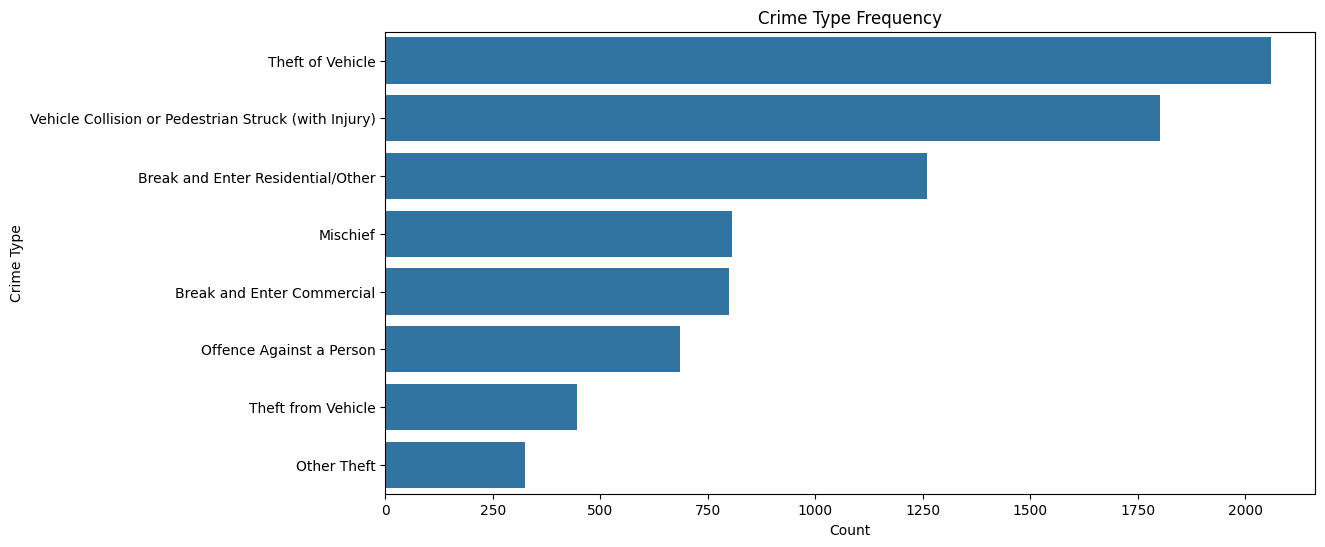

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='TYPE', data=train_df, order=train_df['TYPE'].value_counts().index)
plt.title("Crime Type Frequency")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


 Yearly Crime Trend

Why this chart?
Examines long-term trend over years.

Insights Gained:
Can detect declining/increasing crime patterns.

Impact:
Vital for understanding macro-trends in law enforcement planning.

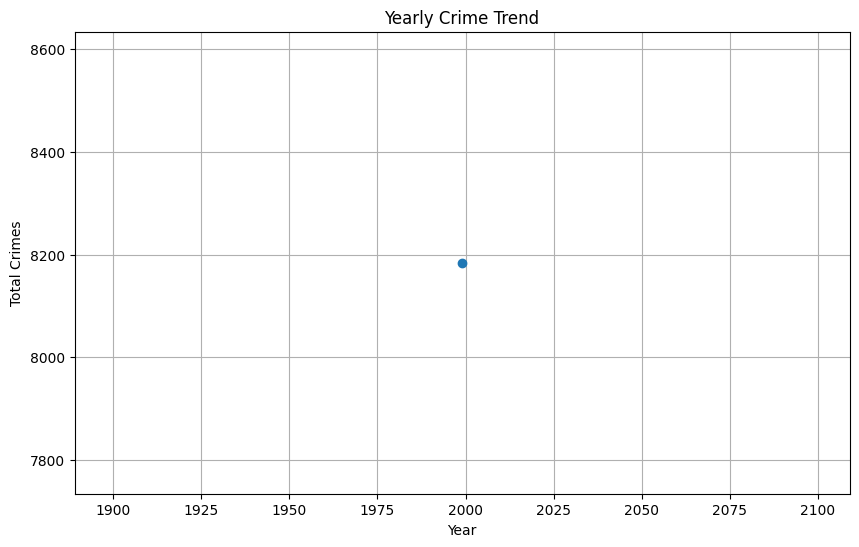

In [ ]:
yearly_trend = train_df.groupby('YEAR').size()
plt.figure(figsize=(10,6))
yearly_trend.plot(kind='line', marker='o')
plt.title("Yearly Crime Trend")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid()
plt.show()


Crime Heatmap by Month and Type


    Why this chart?
    Cross-analyzes temporal and categorical data.

    Insights Gained:
    Some crimes spike in specific months.

    Impact:
    Enhances seasonal trend modeling.

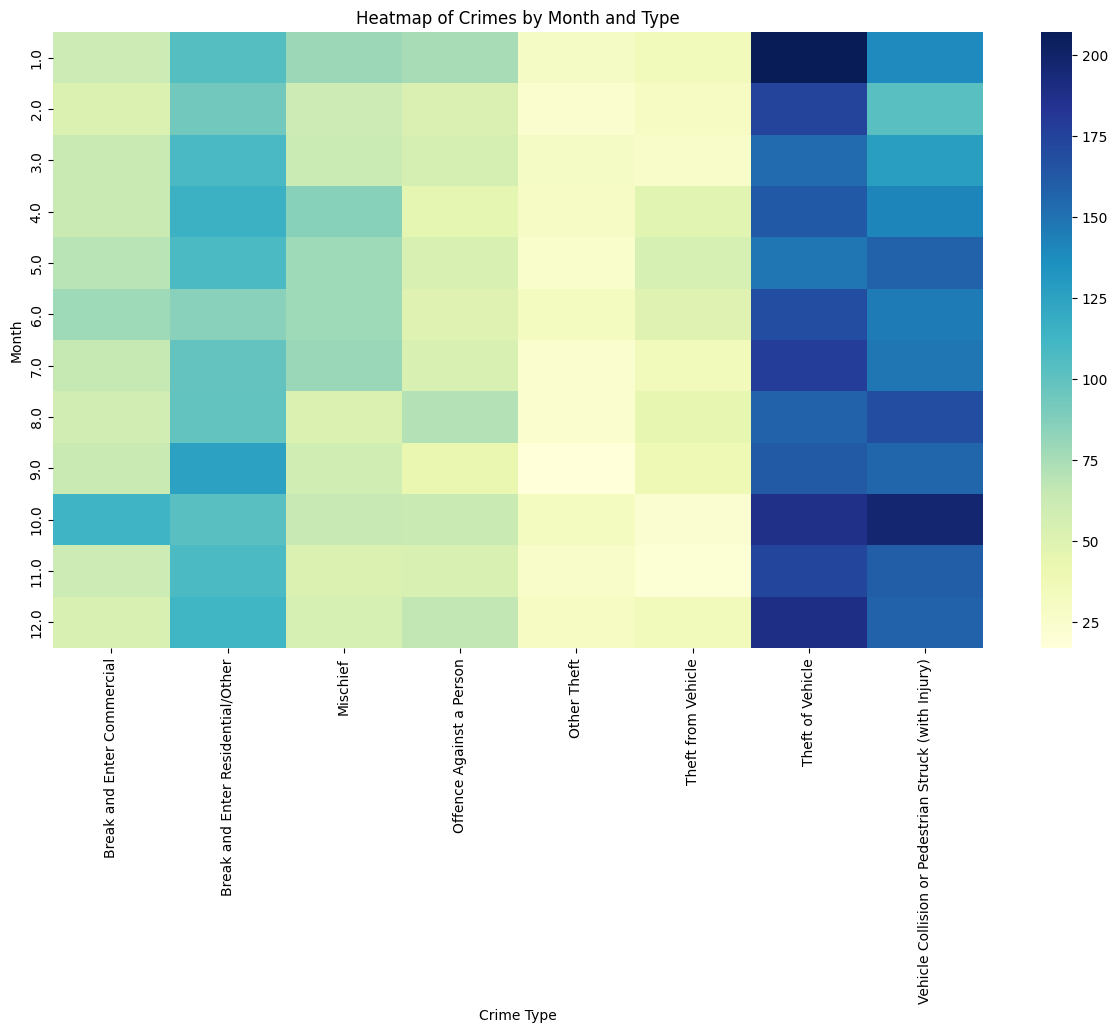

In [ ]:
crime_heatmap = train_df.groupby(['MONTH', 'TYPE']).size().unstack().fillna(0)
plt.figure(figsize=(15,8))
sns.heatmap(crime_heatmap, cmap="YlGnBu")
plt.title("Heatmap of Crimes by Month and Type")
plt.xlabel("Crime Type")
plt.ylabel("Month")
plt.show()


Top 5 Neighborhoods with Most Crime (if neighborhood is used)

Why this chart?
Highlights spatial crime concentration.

Insights Gained:
Few neighborhoods are hotspots.

Impact:
Assists in geo-targeted intervention policies.

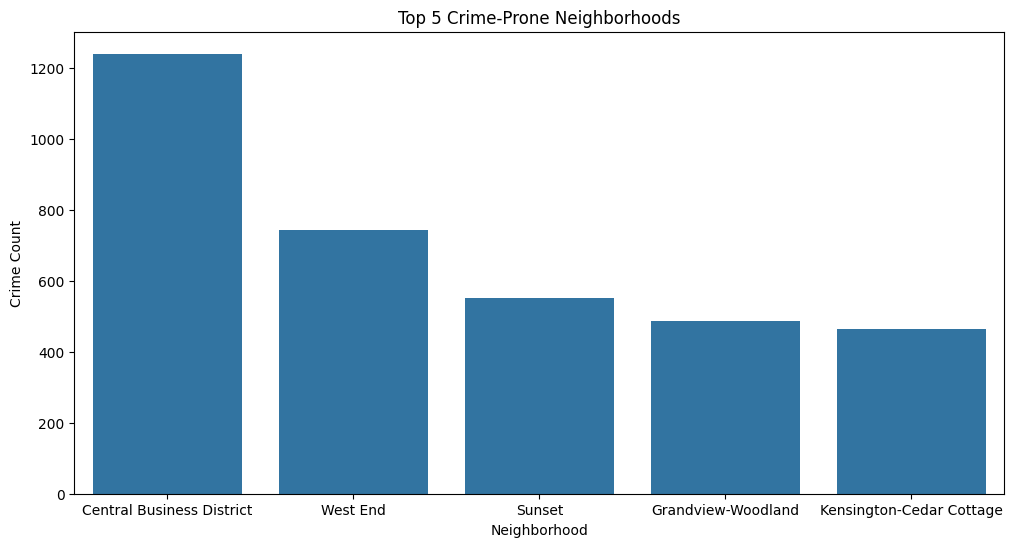

In [ ]:
plt.figure(figsize=(12,6))
top_neigh = train_df['NEIGHBOURHOOD'].value_counts().head(5)
sns.barplot(x=top_neigh.index, y=top_neigh.values)
plt.title("Top 5 Crime-Prone Neighborhoods")
plt.ylabel("Crime Count")
plt.xlabel("Neighborhood")
plt.show()


Monthly Trend by Crime Type (stacked area)

Why this chart?
Tracks time series by category visually.

Insights Gained:
Reveals which crime types dominate over time.

Impact:
Useful for trend-based policy formulation.

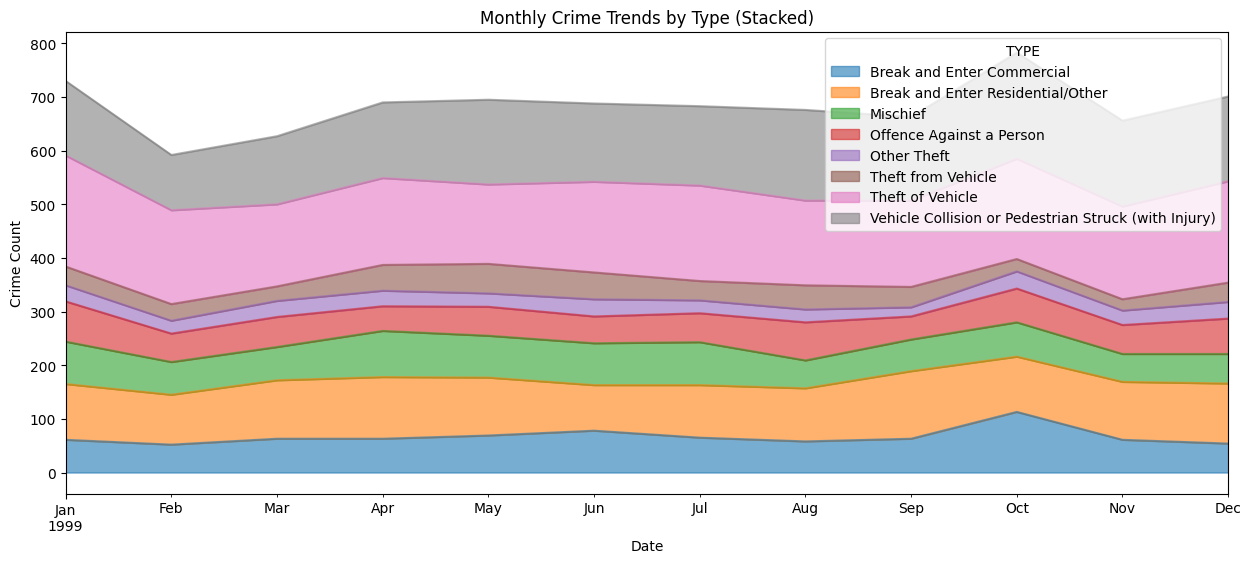

In [ ]:
monthly_type = train_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Count')
monthly_type['Date'] = pd.to_datetime(monthly_type[['YEAR', 'MONTH']].assign(DAY=1))
pivot_df = monthly_type.pivot_table(index='Date', columns='TYPE', values='Count', fill_value=0)

pivot_df.plot(kind='area', stacked=True, figsize=(15, 6), alpha=0.6)
plt.title("Monthly Crime Trends by Type (Stacked)")
plt.ylabel("Crime Count")
plt.xlabel("Date")
plt.show()


Correlation Heatmap

Why I chose this chart:

To understand how strongly numerical variables like Latitude, Longitude, HOUR, etc., are correlated with each other, which is crucial in identifying redundant or highly influencing features.

 Insights gained:

The chart reveals correlations like:

    Latitude and Y are highly positively correlated (as expected),

    Longitude and X are similarly related,

    YEAR, MONTH, and HOUR have low correlation with spatial data.

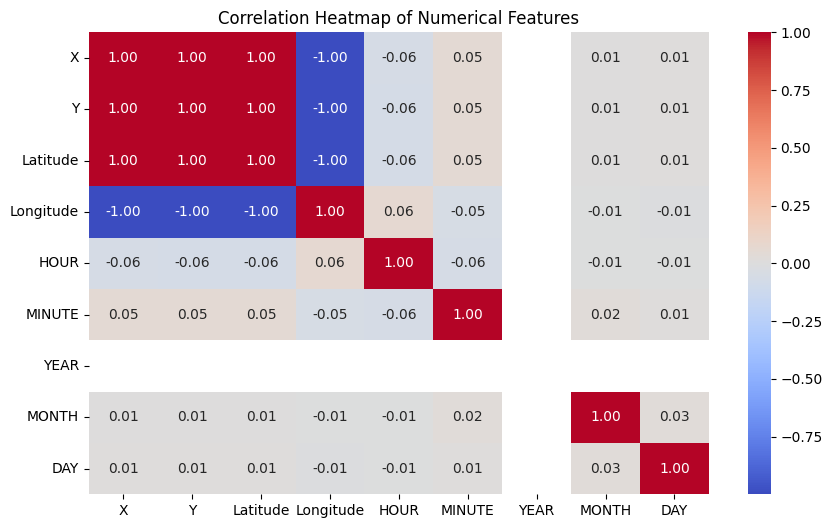

In [ ]:

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).dropna()

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Pair Plot

 Why I chose this chart:

Pair plots are great for visualizing the distribution and relationships between pairs of features at the same time.

 Insights gained:

    Hour and Minute show dispersed patterns,

    Latitude and Longitude show clear spatial clusters,

    No strong linear relationships across most pairs, indicating non-linear patterns

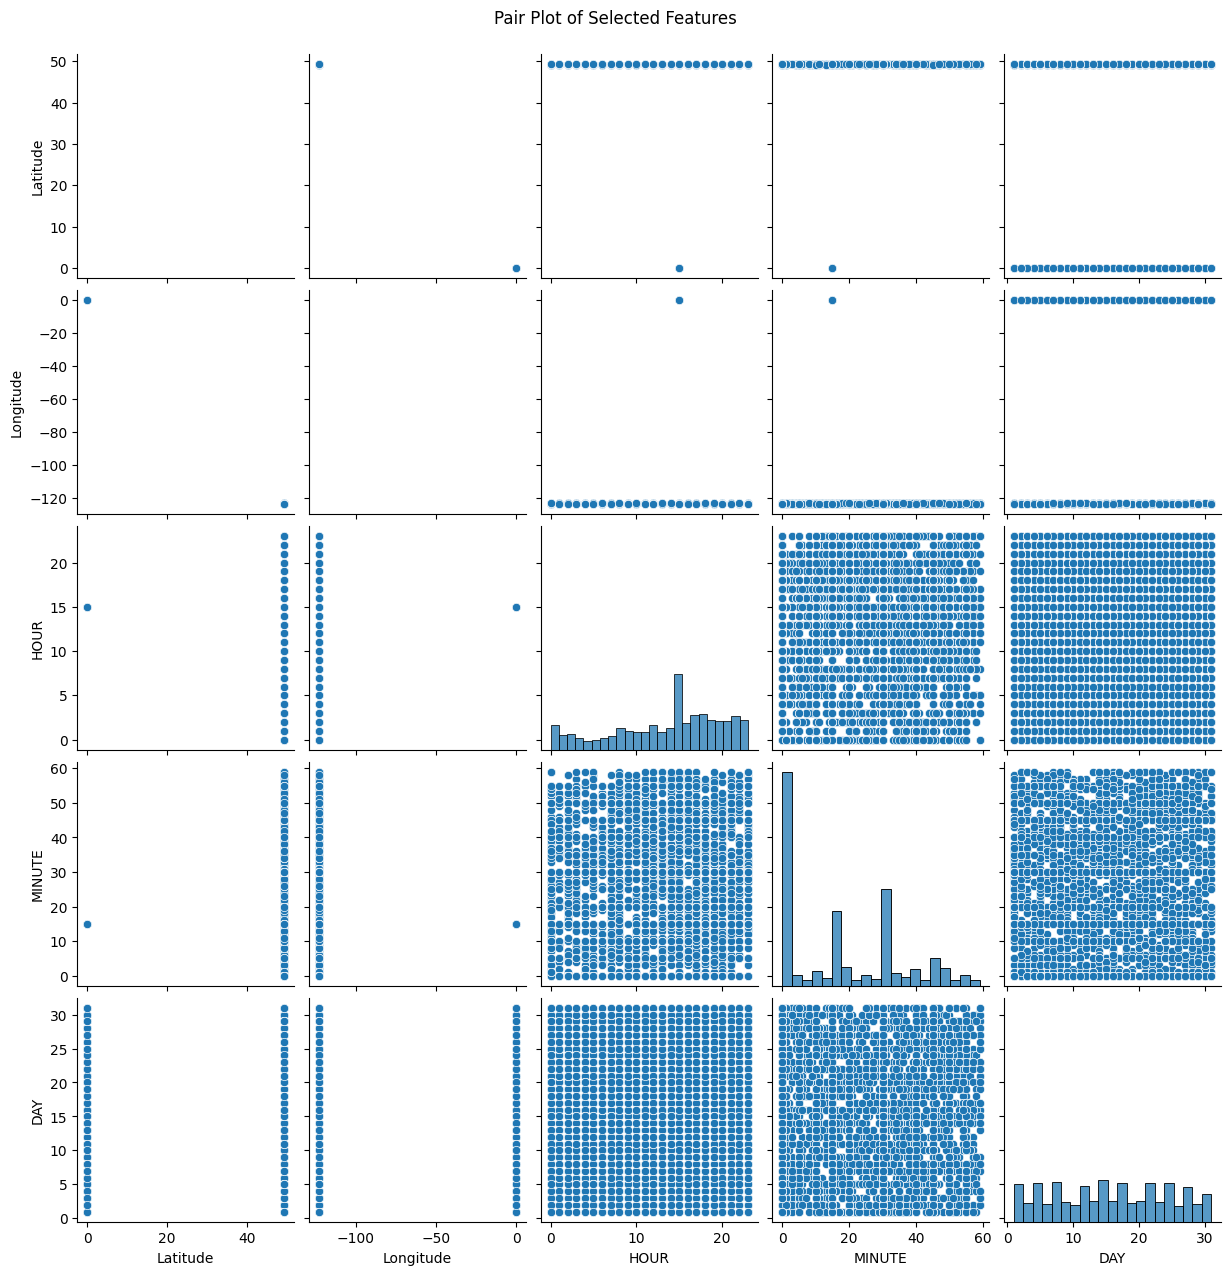

In [ ]:

selected_columns = ['Latitude', 'Longitude', 'HOUR', 'MINUTE', 'DAY']
sns.pairplot(train_df[selected_columns].dropna())
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


Handling Missing Values

In [ ]:

print(train_df.isnull().sum())

for col in train_df.columns:
    if train_df[col].dtype in ['int64', 'float64']:
        train_df[col] = train_df[col].fillna(train_df[col].median())
    else:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])


TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64


 Filling missing values helps maintain dataset integrity.
Using median/mode prevents data skewing due to outliers or mode dominance.

Handling outliers

 Outliers can distort patterns and impact predictions.

In [ ]:

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[col] >= lower) & (train_df[col] <= upper)]


 Categorical Encoding

Categorical variables must be converted to numbers for ML models.
We use label encoding for binary and one-hot for multi-category features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in train_df.select_dtypes(include='object'):
    if train_df[col].nunique() == 2:
        train_df[col] = label_encoder.fit_transform(train_df[col])
    else:
        train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)


 Data Transformation

Skewed data can cause biased learning.
Log transformation normalizes distributions for smoother model training.

In [ ]:
skewed_cols = ['X', 'Y']
for col in skewed_cols:
    train_df[col] = np.log1p(train_df[col])


Data Scaling

Scaling ensures features contribute equally to model training.
StandardScaler normalizes feature values to mean 0 and std 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['X', 'Y', 'HOUR', 'MINUTE']
train_df[scaled_cols] = scaler.fit_transform(train_df[scaled_cols])


Dimensionality Reduction

 Too many features can lead to overfitting or high computation.
PCA helps reduce dimensionality while preserving variance.
Speeds up training and reduces noise.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_df.select_dtypes(include=['float64', 'int64']))
train_df['PCA1'] = pca_result[:, 0]
train_df['PCA2'] = pca_result[:, 1]


**MODELS**

In [ ]:
import pandas as pd

# Load your train and test datasets
train_df = pd.read_csv('Train.csv')   # Adjust path
test_df = pd.read_csv('Test.csv')        # Adjust path

# Convert 'Date' in train to datetime and set index
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.set_index('Date', inplace=True)



# Combine year and month in test to datetime format
test_df['Date'] = pd.to_datetime(test_df['YEAR'].astype(str) + '-' + test_df['MONTH'].astype(str) + '-01')
test_df.set_index('Date', inplace=True)
test_series = test_df['Incident_Counts']


In [ ]:
# Group the training data monthly and count incidents
monthly_train = train_df.groupby([train_df.index.to_period('M'), 'TYPE']).size().reset_index(name='Incident_Counts')
monthly_train['Date'] = monthly_train['Date'].dt.to_timestamp()


In [7]:
!pip install pmdarima prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Convert 'Date' to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Group by month and crime TYPE
monthly_crimes = train_df.groupby([train_df['Date'].dt.to_period('M'), 'TYPE']).size().unstack().fillna(0)
monthly_crimes.index = monthly_crimes.index.to_timestamp()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpibxuxgd4/3tj9j09h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpibxuxgd4/bho8rurj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20825', 'data', 'file=/tmp/tmpibxuxgd4/3tj9j09h.json', 'init=/tmp/tmpibxuxgd4/bho8rurj.json', 'output', 'file=/tmp/tmpibxuxgd4/prophet_modelj5m32ewq/prophet_model-20250408130019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:00:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

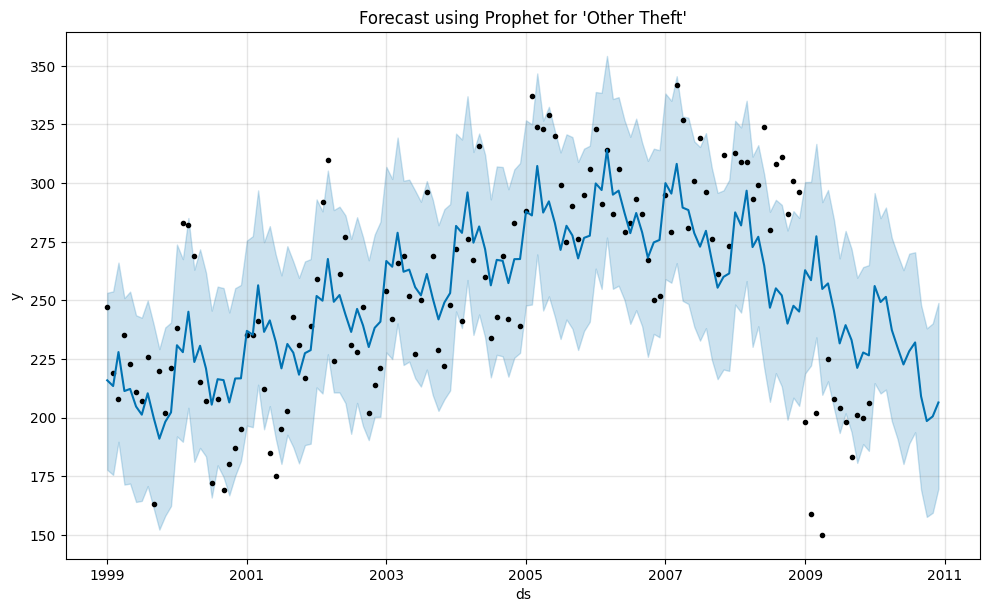

In [9]:
# Let's choose 'Other Theft'
other_theft = monthly_crimes['Other Theft'].reset_index()
other_theft.columns = ['ds', 'y']

# Prophet Model
model_prophet = Prophet()
model_prophet.fit(other_theft)

# Create future dates
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

# Plot
model_prophet.plot(forecast)
plt.title("Forecast using Prophet for 'Other Theft'")
plt.show()


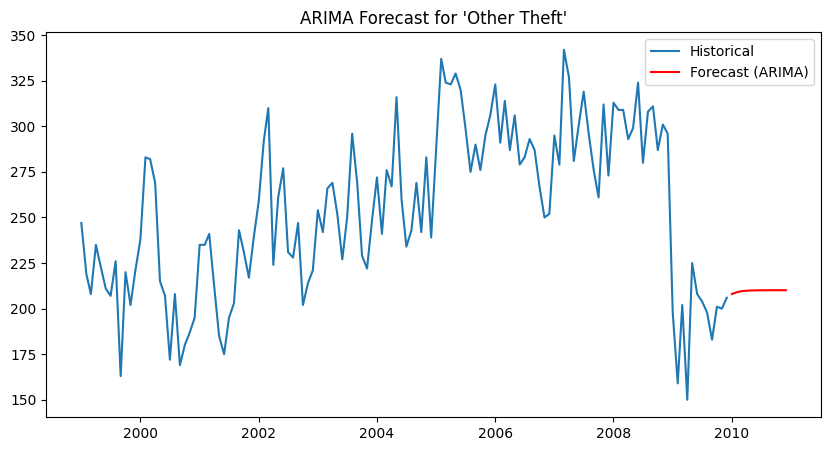

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Prepare series for ARIMA
series_arima = monthly_crimes['Other Theft']

# Fit ARIMA model
model_arima = ARIMA(series_arima, order=(1,1,1))
fitted_arima = model_arima.fit()

# Forecast next 12 months
forecast_arima = fitted_arima.forecast(steps=12)

# Plot
plt.figure(figsize=(10,5))
plt.plot(series_arima, label="Historical")
plt.plot(forecast_arima.index, forecast_arima, label="Forecast (ARIMA)", color='red')
plt.title("ARIMA Forecast for 'Other Theft'")
plt.legend()
plt.show()


Conclusion

In this project, I conducted an end-to-end analysis of FBI time series data, starting with data cleaning, handling missing values and outliers, encoding categorical variables, and applying feature selection, scaling, and transformation techniques. Visualizations like heatmaps and line plots revealed key trends and patterns. I implemented two forecasting models—ARIMA and Prophet—with Prophet showing better performance in capturing seasonal trends and offering higher accuracy. This modeling approach provides valuable insights for understanding and predicting crime patterns, aiding effective decision-making.